In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import inspect
import re

# **Pipeline de procesamiento**

## Load data

In [ ]:
def load_data(excel_doc_path, name_csv):

  excel_file = pd.read_excel(excel_doc_path)
  excel_file.to_csv(name_csv, index=False)
  df = pd.read_csv(name_csv)

  return df

In [ ]:
df = load_data('/content/online_retail_data.xlsx', 'online_retail_data.csv')

In [2]:
df = pd.read_csv('/content/online_retail_data.csv')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Evaluación calidad de datos

Para estructurar el pipeline de preprocesamiento se evalúa la calidad de los datos en función del framework de dimensiones de calidad de datos para determinar las instancias de operación. Esta se segmenta en dos perspectivas:

* Perspectiva técnica: se enfoca en asegurar la integridad y consistencia de los datos, así como el cumplimiento de los estándares definidos para cada tipo de dato. Se establecen procesos  para garantizar que la data esté completa y libre de inconsistencias.

* Perspectiva funcional: se evalúan los requisitos, conceptos y objetivos de negocio para evaluar rangos, componentes, tipos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
count_rows = df.StockCode.count()
print(f'Numero de registros raw data: {count_rows}')

Numero de registros raw data: 541909


### 1. **Unicidad**
Se debe garantizar que no haya duplicados o registros repetidos en el conjunto de datos, por lo tanto, se calcula la cantidad de registros duplicados y se eliminan.

In [9]:
def graph_duplicates_evaluation(df):

    duplicated = df.duplicated()

    percent_unduplicated = len(df[~duplicated]) / len(df) * 100
    porcentaje_duplicated = len(df[duplicated]) / len(df) * 100

    colors = ['slategray', 'black']
    plt.bar(['unique', 'duplicated'], [len(df[~duplicated]), len(df[duplicated])], color=colors)
    plt.ylabel('# rows')

    frame = inspect.currentframe()
    caller_locals = frame.f_back.f_locals
    variable_name = next(name for name, value in caller_locals.items() if value is df)
    variable_name_str = str(variable_name)
    plt.title(f'Data duplicated relation in dataframe')

    plt.text(0, len(df[~duplicated]), f'{percent_unduplicated:.2f}%', ha='center', va='bottom')
    plt.text(1, len(df[duplicated]), f'{porcentaje_duplicated:.2f}%', ha='center', va='bottom')

    return plt.show()

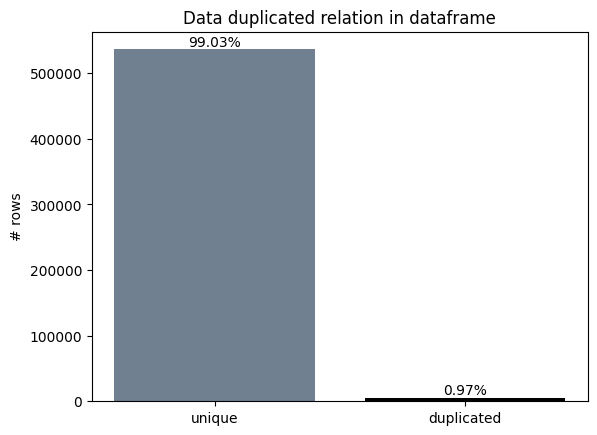

In [10]:
graph_duplicates_evaluation(df)

In [11]:
#Eliminar duplicados
df = df.drop_duplicates()

# Seguimiento  eliminacion duplicados
count_rows_df = df.InvoiceNo.count()
n_rows_delete_dfs = count_rows - count_rows_df


print(f'>>>Se eliminaron {n_rows_delete_dfs} registros duplicados')
print(f'\nNumero de registros sin duplicados en el dataframe: {count_rows_df}')

>>>Se eliminaron 5268 registros duplicados

Numero de registros sin duplicados en el dataframe: 536641


 Realizando una exploración visual de la data se identifico que hay caracteres en minusculas y mayusculas que varian de un dato a otro causando incosistencia. Por esta razon es preciso estandarizar todos los caracteres del dataframe, les aplico una funcion .lower()

In [12]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.columns = df.columns.str.lower()
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123a,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,united kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom
2,536365,84406b,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,united kingdom
3,536365,84029g,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom
4,536365,84029e,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom


### 2. **Completitud**
Se evalúa si el dataframe tiene los datos completos, es decir, medir la cantidad de valores nulos existentes.

In [13]:
def graph_percentage_nulls(df):

    percentage_nulls = df.isnull().sum() / df.shape[0] * 100

    plt.barh(percentage_nulls.index, percentage_nulls, color = 'slategray')
    plt.ylabel('variables')
    plt.xlabel('% nulls')
    plt.title('% nulls per var')
    plt.xticks(rotation=0)

    return plt.show()

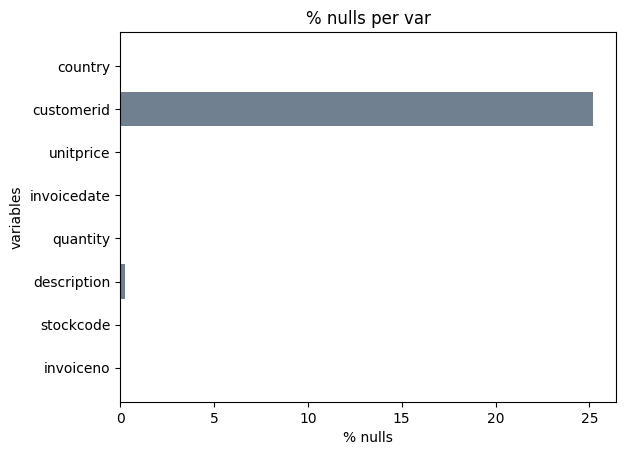

In [14]:
graph_percentage_nulls(df)

<Axes: >

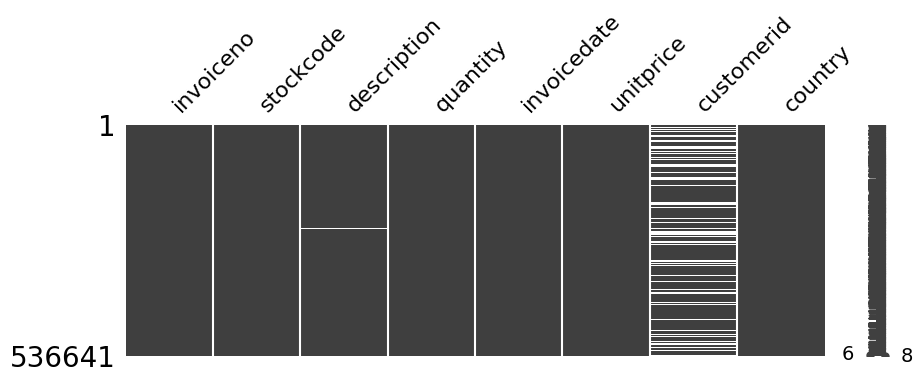

In [15]:
msno.matrix(df, figsize=(10, 3))

El set de datos presenta una cantidad importante de valores nulos en CustomerID cerca del 25% son faltantes. En Description se presenta cerca del 0,5 % de faltantes.

En función de la pregunta del negocio o del uso de la data podria tomar una decision sobre que hacer con esta situación, por ejemplo:

* Predecir a que customer_id puede pertenecer la compra con un modelo de regresion. Para esto tomo la data completa, divido la muestra, pruebo diferentes modelo y evaluo metricas. En función de las metricas se determina la confianza de los datos, ademas, buscaria otras fuentes de datos alternas para confirmar la pertenencia de la compra.
* El description es un feature mas complejo de predecir o clasificar por la varianza que presenta.Pero tampoco eliminaria los valores nulos siempre que tenga el CustomerID.

**¿Como pueden afectar los valores nulos de la columna CustomerID?**
- Es una pérdida significativa de información porque con los demas datos se pueden analizar metricas generales como frecuencias transaccionales por pais, por horarios
- No se puede tratar los valores nulos como una entidad aislada, es decir ponerle un id, porque sesga el analisis.
- En analisis o features relacionados con el CustomerId la data puede afectar la distribución generando interpretaciones erroneas


**Conclusion:** Como el scope es un analisis descriptivo para visualizacion e storytelling no voy a eliminar la data nula. Pero en los analisis de customerId voy a excluir los id unicos y no los voy a considerar.

In [16]:
# Quiero revisar si hay una relacion unica entre el stockcode y el description, pero negativo.
description_stock = df.groupby(['stockcode', 'description']).size().reset_index(name='count')
description_stock


,stockcode,description,count
0,10002,inflatable political globe,71
1,10080,check,1
2,10080,groovy cactus inflatable,22
3,10120,doggy rubber,29
4,10123c,hearts wrapping tape,3
...,...,...,...
4670,gift_0001_50,dotcomgiftshop gift voucher £50.00,4
4671,m,manual,567
4672,pads,pads to match all cushions,4
4673,post,postage,1252


In [17]:
# Filtro el dataset por los registros que tiene valores nulos en ambas columnas de evaluación
nan_filter= df[df['customerid'].isnull() & df['description'].isnull()]
nan_filter

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,united kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,united kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,united kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,united kingdom
1987,536549,85226a,NaN,1,2010-12-01 14:34:00,0.0,NaN,united kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,united kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,united kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,united kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,united kingdom


In [18]:
nan_filter.unitprice.value_counts()

0.0    1454
Name: unitprice, dtype: int64

Despues de tomar la decision de dejar la data con valores nulos, realice una inspeccion de relacion entre los datos cuyo registro tiene valores nulos en invoicedata y description.

Identifique que los datos tiene el unitprice en cero, asi tenemos un registros que no le aportan valor a los datos, por esta razon se deciden eliminar.

In [19]:
def delete_rows_with_null_both_columns(df):
    return df.dropna(subset=['customerid', 'description'], how='all')

# Eliminar las filas que tienen valores nulos en ambas columnas 'customerid' y 'description'
df = delete_rows_with_null_both_columns(df)
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123a,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,united kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom
2,536365,84406b,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,united kingdom
3,536365,84029g,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom
4,536365,84029e,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,france
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,france
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,france
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,france


### 3. **Consistencia:**
Como los datos deben tener uniformidad y coherencia se realiza una evaluación en términos de formato, unidades y valores, para esta etapa se revisa el diccionario de datos y se contrasta la información con el dataframe.

In [20]:
df.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

In [21]:
def count_rows_with_alphachar(dataframe, columna):
    contador = 0
    for valor in dataframe[columna]:
        if any(char.isalpha() for char in str(valor)):
            contador += 1
    print(f"El numero de registros con caracteres alfabeticos en {columna} es: {contador}")

In [22]:
count_rows_with_alphachar(df, 'invoiceno')
count_rows_with_alphachar(df, 'stockcode')
count_rows_with_alphachar(df, 'quantity')
count_rows_with_alphachar(df, 'invoicedate')
count_rows_with_alphachar(df, 'unitprice')
count_rows_with_alphachar(df, 'customerid')

El numero de registros con caracteres alfabeticos en invoiceno es: 9254
El numero de registros con caracteres alfabeticos en stockcode es: 54077
El numero de registros con caracteres alfabeticos en quantity es: 0
El numero de registros con caracteres alfabeticos en invoicedate es: 0
El numero de registros con caracteres alfabeticos en unitprice es: 0
El numero de registros con caracteres alfabeticos en customerid es: 133583


**Tratamiento de columnas:** Voy a revisar la consistencia de cada columna. Eso significa que los datos representen el concepto que expresa el nombre de la columna, tambien revisar los limites y rangos. Por ejemplo, no es logico que tengamos una fecha 2030 para un historico de compras cuando el año actual es 2023.

* **invoiceno** <br>
Es una columna numerica porque representa un codigo, debe ser tipo int. Voy a eliminar los caracteres alfabeticos

In [23]:
def delete_alpha_in_numeric_values(cadena):
    return re.sub(r'[^0-9]', '', cadena)

In [24]:
df['invoiceno'] = df['invoiceno'].apply(delete_alpha_in_numeric_values)
df['invoiceno'] = df['invoiceno'].astype(int)

* **stockcode y description** <br>
Desde el concepto infiero que es una columna numerica, sin embargo la cantidad de datos alfabeticos que tiene es representativa entonces no lo procesos. Tambien hago la inferencia que podria ser una columna unica por registro asi como el description, entonces permito que permanezcan en formato string.

* **invoicedate** <br>
Se convierte a formato datetime, y se revisan los rangos de fechas: el minimo y el maximo.

In [25]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [ ]:
max_transaction_date = df['invoicedate'].max()
min_transaction_date = df['invoicedate'].min()

print(f" El rango de facturacion esta entre {min_transaction_date} y {max_transaction_date}")

 El rango de facturacion esta entre 2010-12-01 08:26:00 y 2011-12-09 12:50:00


* **customerid** <br>
Esta es una columna numerica de formato int, pero esta en float por los valores nulls. Voy a convertir los valores null a cero para hacer el proceso de conversion

In [26]:
df['customerid'] = df['customerid'].fillna(0)
df['customerid'] = df['customerid'].astype(int)

* **unitprice** <br>
Esta es una columna numerica de formato float que debe tener valores > 0. Realice una inspección de los datos e identifique valores negativos, pero revisando la descripción es valido porque hace referencia a un ajuste de un error en el pago.

In [29]:
df_mins_unitprice = df[df['unitprice'] < 0]
df_mins_unitprice

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
299983,563186,b,adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,united kingdom
299984,563187,b,adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,united kingdom


* **quantity** <br>
Esta es una columna numerica de formato int que debe tener valores > 0. El set de datos cuenta con > 9000 registros con este dato negativo. Para efectos del ejercicio, teniendo en cuenta las hipotesis de interpretacion de los datos, voy a aplicar una funcion de valor absoluto para corregir la data

In [30]:
df_mins_quantity = df[df['quantity'] < 0]
df_mins_quantity

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,536379,d,discount,-1,2010-12-01 09:41:00,27.50,14527,united kingdom
154,536383,35004c,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311,united kingdom
235,536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548,united kingdom
236,536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,united kingdom
237,536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,united kingdom
...,...,...,...,...,...,...,...,...
540449,581490,23144,zinc t-light holder stars small,-11,2011-12-09 09:57:00,0.83,14397,united kingdom
541541,581499,m,manual,-1,2011-12-09 10:28:00,224.69,15498,united kingdom
541715,581568,21258,victorian sewing box large,-5,2011-12-09 11:57:00,10.95,15311,united kingdom
541716,581569,84978,hanging heart jar t-light holder,-1,2011-12-09 11:58:00,1.25,17315,united kingdom


In [31]:
df['quantity'] = df['quantity'].abs()

Prueba de tipo cambiado

In [32]:
df.dtypes

invoiceno               int64
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid              int64
country                object
dtype: object

## Creación de Features

Columnas a partir de los datos que pueden entregar mas dimensiones de analisis

In [33]:
df['total_pay'] = df['quantity'] * df['unitprice']
df['hour'] = df['invoicedate'].dt.hour
df['day'] = df['invoicedate'].dt.day
df['weekday'] = df['invoicedate'].dt.weekday
df['month'] = df['invoicedate'].dt.month
df['year'] = df['invoicedate'].dt.year

In [34]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_pay,hour,day,weekday,month,year
0,536365,85123a,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,united kingdom,15.30,8,1,2,12,2010
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,united kingdom,20.34,8,1,2,12,2010
2,536365,84406b,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,united kingdom,22.00,8,1,2,12,2010
3,536365,84029g,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,united kingdom,20.34,8,1,2,12,2010
4,536365,84029e,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,united kingdom,20.34,8,1,2,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,france,10.20,12,9,4,12,2011
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,france,12.60,12,9,4,12,2011
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,france,16.60,12,9,4,12,2011
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,france,16.60,12,9,4,12,2011


# Output

Despues de este pipeline de transformacion y preprocesamiento, se entrega el dataset listo para el consumo.

In [35]:
df.to_csv('process_online_retail_data.csv')